<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 전염병 예측 인공지능

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [3]:
!git clone https://github.com/yhlee1627/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

fatal: destination path 'deeplearning' already exists and is not an empty directory.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

89 23


In [5]:
def create_dataset(dataset, look_back):
    x_data = []
    y_data = []
    for i in range(len(dataset)-look_back):
        data = dataset[i:(i+look_back), 0]
        x_data.append(data)
        y_data.append(dataset[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [6]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(86, 3) (86,)
(20, 3) (20,)


In [7]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(86, 1, 3) (86,)
(20, 1, 3) (20,)


In [8]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
86/86 [==============================] - 1s 2ms/step - loss: 2.4825
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 1.2201
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: 0.5164
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2323
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.1411
Epoch 6/100
86/86 [==============================] - 0s 4ms/step - loss: 0.1096
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0923
Epoch 8/100
86/86 [==============================] - 0s 4ms/step - loss: 0.0786
Epoch 9/100
86/86 [==============================] - 0s 4ms/step - loss: 0.0661
Epoch 10/100
86/86 [==============================] - 0s 5ms/step - loss: 0.0547
Epoch 11/100
86/86 [==============================] - 0s 5ms/step - loss: 0.0448
Epoch 12/100
86/86 [==============================] - 0s 4ms/step - loss: 0.0361
Epoch 13/100
86/86 [=================

In [10]:
trainPredict = model.predict(X_train)
trainPredict[:10]

3/3 [==============================] - 0s 3ms/step


array([[0.0223856 ],
       [0.02250815],
       [0.0226225 ],
       [0.02266334],
       [0.02269082],
       [0.02269082],
       [0.02269082],
       [0.02272273],
       [0.02279548],
       [0.02289571]], dtype=float32)

In [11]:
TrainPredict = scaler.inverse_transform(trainPredict)
TrainPredict[:10]

array([[277.40503],
       [278.79224],
       [280.08667],
       [280.54904],
       [280.8601 ],
       [280.8601 ],
       [280.8601 ],
       [281.22128],
       [282.0448 ],
       [283.1794 ]], dtype=float32)

In [12]:
Y_train = scaler.inverse_transform([y_train])
Y_train[:10]

array([[   27.00000082,    28.00000066,    28.00000066,    28.00000066,
           28.00000066,    28.00000066,    29.00000049,    30.00000033,
           31.00000016,    51.00000214,   104.00000395,   204.00001384,
          433.00000247,   602.00000099,   832.99993658,   976.9999972 ,
         1260.99992933,  1766.00008335,  2337.00011053,  3150.00006622,
         3736.00006457,  4212.00004942,  4811.99990841,  5327.99992884,
         5766.00009917,  6284.00034066,  6766.99991846,  7134.00016901,
         7381.99991731,  7512.99972177,  7754.99981896,  7868.99993724,
         7979.00028811,  8086.0001387 ,  8161.99976773,  8236.00018779,
         8320.00002636,  8413.00001631,  8564.9999491 ,  8652.00028794,
         8798.99983675,  8897.00021069,  8960.99986278,  9037.00016654,
         9136.99974945,  9240.99977449,  9331.99988074,  9478.00016242,
         9583.00012931,  9661.00031677,  9785.99979541,  9886.99999489,
         9976.00021744, 10061.99993971, 10155.99987151, 10236.99

In [13]:
trainPredict = model.predict(X_train)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
testPredict = model.predict(X_test)
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

1/1 [==============================] - 0s 14ms/step


In [14]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print(trainScore)
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print(testScore)

237.69622918295465
198.6225441267095


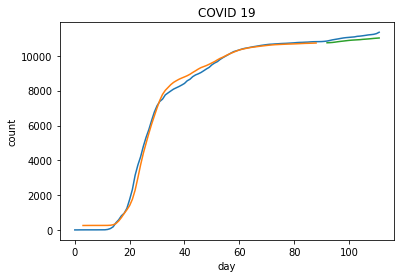

In [15]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(TrainPredict)+look_back*2:len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('day')
plt.ylabel('count')
plt.title('COVID 19')
plt.show()